In [22]:
import matplotlib.pyplot as plt
import numpy as np

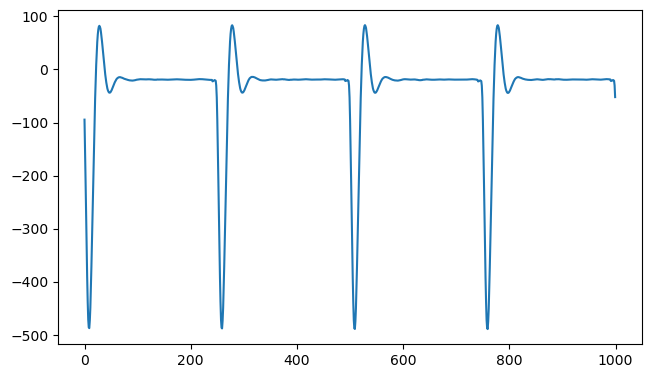

In [24]:
fig, ax = plt.subplots(1,1, constrained_layout=True)

path = '/home/investigator/mariandbt/python/data/'
filename = os.path.join(path, 'Acq_dig2-192.168.0.254_CH2-19.txt')

with open(filename) as f:
    data = np.loadtxt(f)
    
ax.plot(np.mean(data, axis=0))
# ax.plot(data[0])
ax.set_aspect('equal')

In [11]:
! pwd

/home/investigator/mariandbt/python/notebooks
